In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)
from google.colab import drive
drive.mount('/content/drive')

Wed Nov 30 11:50:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.optimizers import Adam
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2


In [ ]:
# Setup the train and test directories
train_dir = "/content/drive/MyDrive/logo_yeni/train/"
test_dir = "/content/drive/MyDrive/logo_yeni/test/"

In [ ]:
# Create train and test data generators and rescale the data 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(90, 90),
                                               class_mode='binary',
                                               color_mode = "grayscale",
                                               batch_size=64,
                                               seed = 42
                                               )
                                            
                                            

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(90, 90),
                                             class_mode='binary',
                                             color_mode = "grayscale",
                                             batch_size=64,
                                             seed = 42
                                             )

Found 583 images belonging to 2 classes.
Found 425 images belonging to 2 classes.


In [ ]:
# Create the model 
model_4 = Sequential([
  Conv2D(filters=8, 
         kernel_size=3, 
         strides=1,
         activation='relu', 
         input_shape=(90, 90, 1)), 
  Conv2D(8, 3, activation='relu'),
  Conv2D(8, 3, activation='relu'),
  Flatten(),
  Dense(64, activation='relu'),
  Dropout(0.2, input_shape=(64,)),  
  Dense(1, activation='sigmoid') 
])

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(0.0001),
                metrics=['accuracy'])

In [ ]:
# model save function
#checkpoint_filepath = '/content/drive/MyDrive/logo_model_.h5'
# checkpoint_path = "101_classes_10_percent_data_model_checkpoint"      
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath = checkpoint_path,
#     save_weights_only = True,
#     monitor = 'val_accuracy',
#     mode = 'max',
#     save_best_only = True)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=50, 
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks = [model_checkpoint_callback])

Epoch 1/50
10/10 [==============================] - 2s 215ms/step - loss: 0.0763 - accuracy: 0.9880 - val_loss: 0.1302 - val_accuracy: 0.9600
Epoch 2/50
10/10 [==============================] - 1s 149ms/step - loss: 0.0658 - accuracy: 0.9897 - val_loss: 0.1448 - val_accuracy: 0.9576
Epoch 3/50
10/10 [==============================] - 1s 152ms/step - loss: 0.0664 - accuracy: 0.9914 - val_loss: 0.1460 - val_accuracy: 0.9529
Epoch 4/50
10/10 [==============================] - 1s 158ms/step - loss: 0.0714 - accuracy: 0.9811 - val_loss: 0.1274 - val_accuracy: 0.9576
Epoch 5/50
10/10 [==============================] - 1s 146ms/step - loss: 0.0826 - accuracy: 0.9811 - val_loss: 0.1278 - val_accuracy: 0.9576
Epoch 6/50
10/10 [==============================] - 1s 156ms/step - loss: 0.0711 - accuracy: 0.9828 - val_loss: 0.1247 - val_accuracy: 0.9553
Epoch 7/50
10/10 [==============================] - 1s 157ms/step - loss: 0.0706 - accuracy: 0.9863 - val_loss: 0.1258 - val_accuracy: 0.9576
Epoch 

In [ ]:
# Check out the layers in our model
model_4.summary()   

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 88, 88, 8)         80        
                                                                 
 conv2d_70 (Conv2D)          (None, 86, 86, 8)         584       
                                                                 
 conv2d_71 (Conv2D)          (None, 84, 84, 8)         584       
                                                                 
 flatten_22 (Flatten)        (None, 56448)             0         
                                                                 
 dense_40 (Dense)            (None, 64)                3612736   
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 1)               

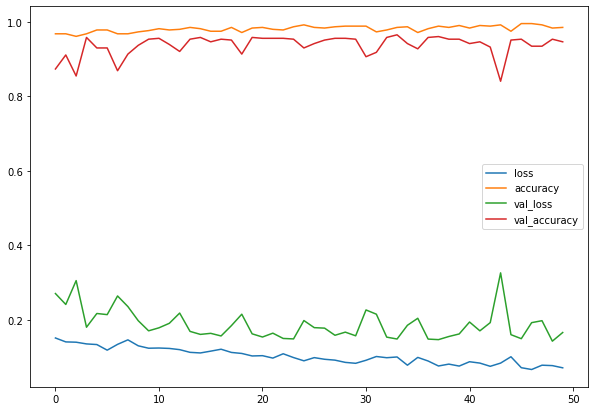

In [ ]:
# Plot the training curves
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# model save function
#model_4.save("/content/drive/MyDrive/logo_model_9.h5") 

In [ ]:
# model load function
model_4 = keras.models.load_model("/content/drive/MyDrive/logo_model_9.h5")

# Prediction

In [ ]:
# load and pre-processing test image's function
def load_and_prep_image(filename, img_shape=90):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 1 colour channels 
  img = tf.image.decode_image(img, channels=1)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# load prediction image's path
logo = load_and_prep_image("/content/drive/MyDrive/logo_yeni/test/logolu/4L_logolu_2372.jpg")


In [ ]:
# fix shape dimension
print(f"Shape before new dimension: {logo.shape}")
logo = tf.expand_dims(logo, axis=0) 
print(f"Shape after new dimension: {logo.shape}")

Shape before new dimension: (90, 90, 1)
Shape after new dimension: (1, 90, 90, 1)


In [ ]:
data_dir = pathlib.Path("/content/drive/MyDrive/logo_yeni/test") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories

In [ ]:
# model predict
pred = model_4.predict(logo)
print(pred[0][0])
pred_class = class_names[int(tf.round(pred)[0][0])]
print("sonuc:", pred_class)

1/1 [==============================] - 0s 25ms/step
0.8082245
sonuc: logosuz


In [ ]:
# result prediction
result = tf.round(pred) 
result 

In [ ]:
# predict all images
test_path = "/content/drive/MyDrive/logo_yeni/test/logolu"
test_imgs = [(cv2.imread(os.path.join(test_path,f)),f) for f in os.listdir(test_path)]
count = 0

for ref_img, f in test_imgs:
    logo = load_and_prep_image(test_path + "/" + f)
    logo = tf.expand_dims(logo, axis=0)
    pred = model_4.predict(logo)

    if pred_class != "logolu":
      print("failed prediction:", f, "score", round(pred[0][0], 2), pred_class)
      count += 1

print("total:", len(test_imgs))
print("failed:", count)
